In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('raw_analyst_ratings.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)

# Display the first few headline lengths
df[['headline', 'headline_length']].head()


,headline,headline_length
0,Stocks That Hit 52-Week Highs On Friday,39
1,Stocks That Hit 52-Week Highs On Wednesday,42
2,71 Biggest Movers From Friday,29
3,46 Stocks Moving In Friday's Mid-Day Session,44
4,B of A Securities Maintains Neutral on Agilent...,87


In [4]:
# Obtain basic statistics for headline lengths
headline_length_stats = df['headline_length'].describe()

# Print the statistics
print(headline_length_stats)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


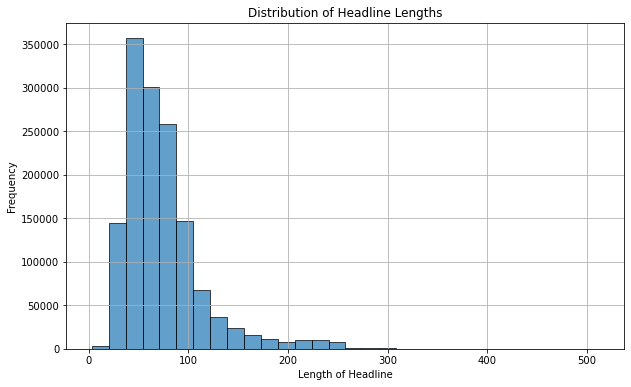

In [5]:
import matplotlib.pyplot as plt

# Plot the distribution of headline lengths
plt.figure(figsize=(10, 6))
plt.hist(df['headline_length'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [6]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the counts
print(publisher_counts)


Paul Quintaro               228373
Lisa Levin                  186979
Benzinga Newsdesk           150484
Charles Gross                96732
Monica Gerson                82380
                             ...  
Joel Morehouse                   1
official@stockmetrix.net         1
Elizabeeth Kalondu               1
Michael Zanger                   1
Gavin McMaster                   1
Name: publisher, Length: 1034, dtype: int64


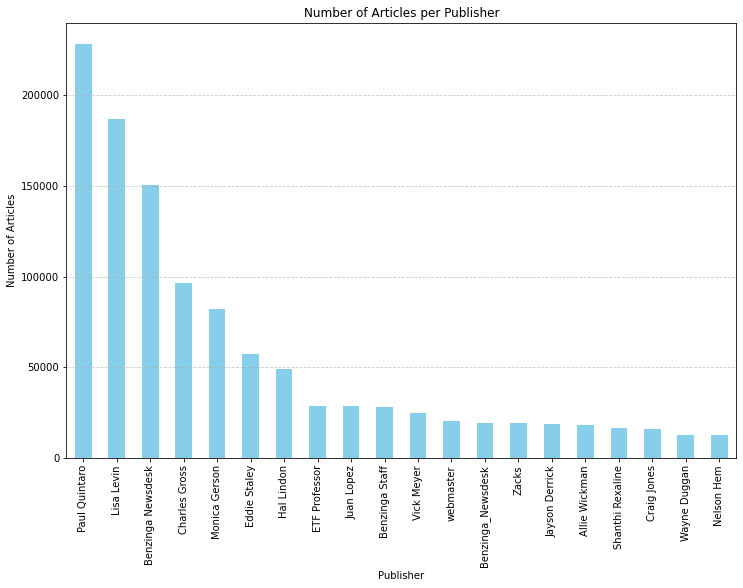

In [7]:
import matplotlib.pyplot as plt

# Plot the number of articles per publisher
plt.figure(figsize=(12, 8))
publisher_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
# Check if 'date' column contains timezone information
print(df['date'].dtype)  # Check dtype to confirm if there are timezone-aware datetimes

# Sample of the date column to understand its format
print(df['date'].head())


object
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object


In [11]:
# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

# Remove timezone information if present
df['date'] = df['date'].dt.tz_localize(None)


In [12]:
# Verify the conversion
print(df['date'].dtype)  # Should show 'datetime64[ns]'
print(df['date'].isna().sum())  # Check for any missing values


datetime64[ns]
0


In [13]:
# Count the number of articles per day
daily_articles = df['date'].dt.date.value_counts().sort_index()

# Display the daily article counts
print(daily_articles)


2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Name: date, Length: 3955, dtype: int64


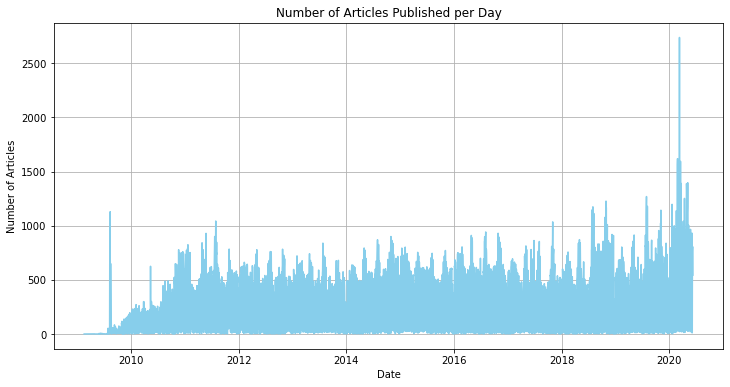

In [14]:
import matplotlib.pyplot as plt

# Plot the number of articles per day
plt.figure(figsize=(12, 6))
daily_articles.plot(kind='line', color='skyblue')
plt.title('Number of Articles Published per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yabak\AppData\Roaming\nltk_data...


                                            headline sentiment
0            Stocks That Hit 52-Week Highs On Friday   neutral
1         Stocks That Hit 52-Week Highs On Wednesday   neutral
2                      71 Biggest Movers From Friday   neutral
3       46 Stocks Moving In Friday's Mid-Day Session   neutral
4  B of A Securities Maintains Neutral on Agilent...  positive
neutral     741194
positive    441858
negative    224276
Name: sentiment, dtype: int64


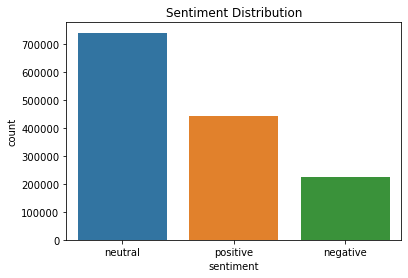

In [15]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the headlines
df['sentiment'] = df['headline'].apply(get_sentiment)

# Display the first few rows to verify
print(df[['headline', 'sentiment']].head())

# Summarize the results
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Optional: Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing
df['clean_headline'] = df['headline'].apply(preprocess_text)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the headlines
X = vectorizer.fit_transform(df['clean_headline'])

# Get feature names and their importance scores
feature_names = vectorizer.get_feature_names()
tfidf_scores = X.sum(axis=0).A1
keywords = dict(zip(feature_names, tfidf_scores))

# Convert to DataFrame for better readability
keywords_df = pd.DataFrame(list(keywords.items()), columns=['Keyword', 'Score']).sort_values(by='Score', ascending=False)

# Display top keywords
print(keywords_df.head(10))


           Keyword         Score
198228      stocks  35955.377890
103758   benzingas  23881.295014
125224    earnings  21888.250571
211208          vs  21134.447792
156840      market  19839.883946
128654         est  19466.142186
123810  downgrades  18582.928627
208171    upgrades  17815.645600
128083         eps  17645.570681
65322       52week  17089.540969


In [20]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Initialize LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust number of topics

# Fit LDA model
lda.fit(X)

# Get the words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
print("Topics and Top Words:")
print_top_words(lda, feature_names, 10)  # Display top 10 words per topic


Topics and Top Words:
Topic #0:
market earnings update stock etfs futures shares ahead etf data
Topic #1:
vs est eps movers reports biggest yesterday sales estimate set
Topic #2:
shares trading higher update lower announces companies analyst market markets
Topic #3:
downgrades upgrades pt session moving target benzingas premarket buy maintains
Topic #4:
stocks scheduled 52week earnings benzingas hit watch highs lows losers


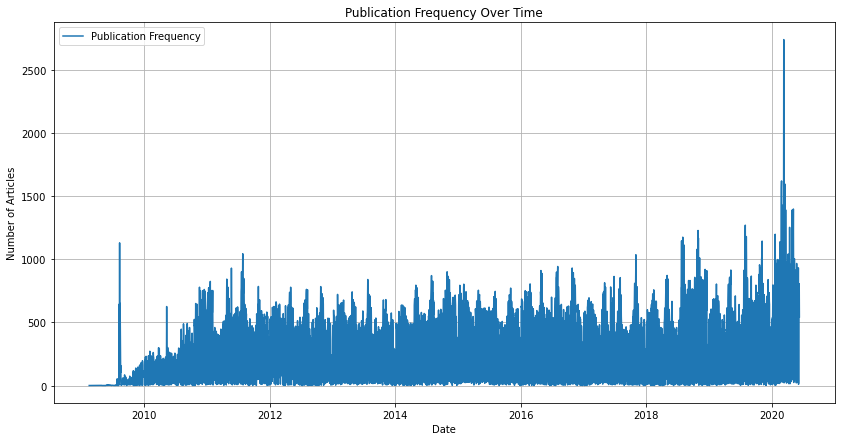

In [22]:
import matplotlib.pyplot as plt

# Step 1: Group and Resample Data
df['date'] = pd.to_datetime(df['date'])
publication_freq = df.groupby(df['date'].dt.date).size()

# Step 2: Plot the Time Series
plt.figure(figsize=(14, 7))
plt.plot(publication_freq, label='Publication Frequency')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Identify Spikes
# Optionally, you can annotate specific dates or zoom into certain periods to see spikes more clearly.


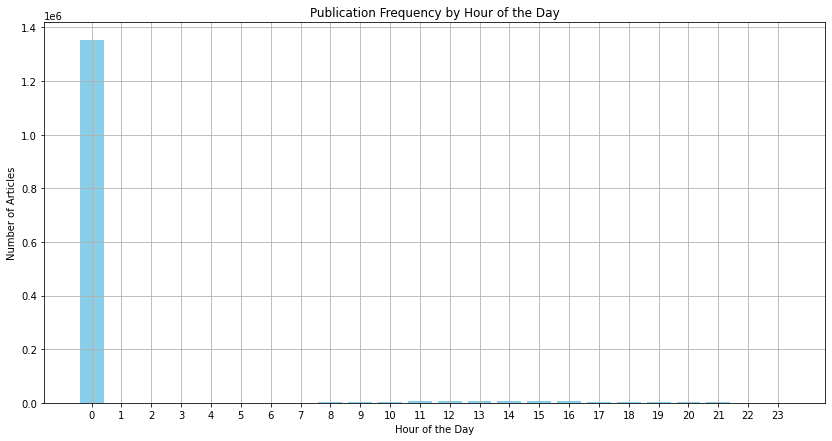

In [23]:
import matplotlib.pyplot as plt

# Step 1: Extract the Hour from the Timestamp
df['time'] = df['date'].dt.hour

# Step 2: Group and Plot the Data
publication_time_freq = df.groupby('time').size()

plt.figure(figsize=(14, 7))
plt.bar(publication_time_freq.index, publication_time_freq.values, color='skyblue')
plt.title('Publication Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Step 3: Analyze Patterns
# Review the plot to see if there are specific hours with a higher concentration of article publications.


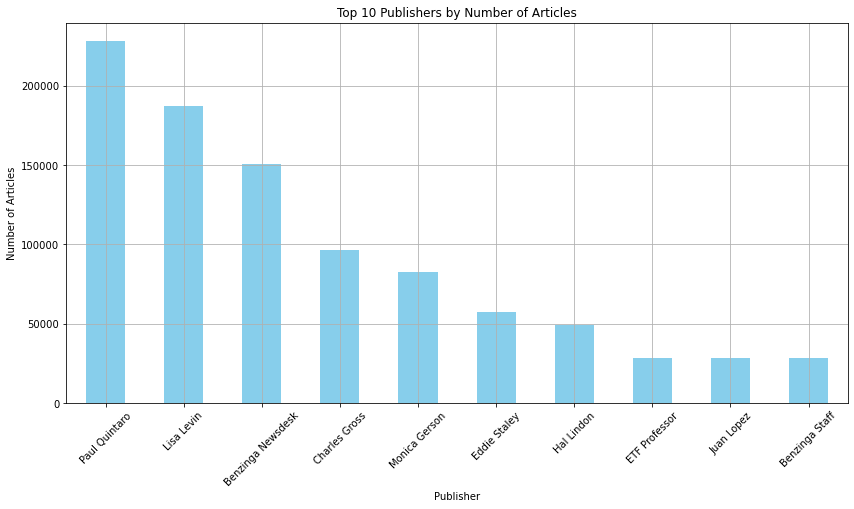

<Figure size 1008x504 with 0 Axes>

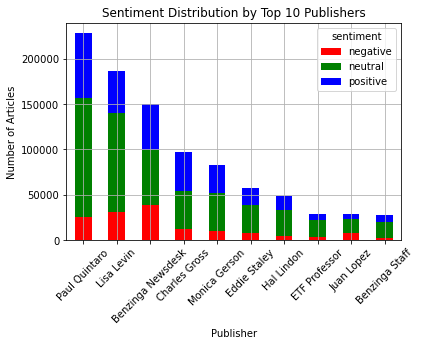

In [24]:
import matplotlib.pyplot as plt

# Step 1: Count Articles by Publisher
publisher_counts = df['publisher'].value_counts()

plt.figure(figsize=(14, 7))
publisher_counts[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 2: Sentiment Distribution by Publisher
sentiment_by_publisher = df.groupby('publisher')['sentiment'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 7))
sentiment_by_publisher.loc[publisher_counts[:10].index].plot(kind='bar', stacked=True, color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 3: Analyze the Differences
# Review the plots to see if some publishers are more likely to publish positive or negative news.


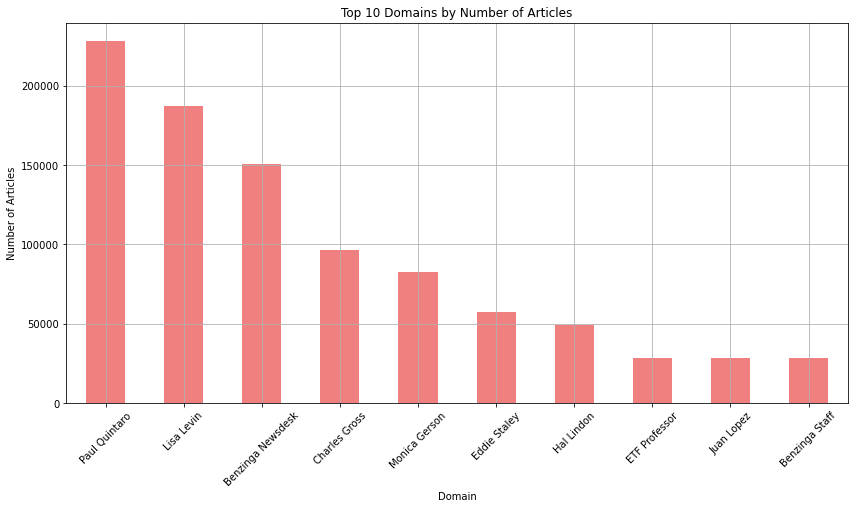

In [25]:
import re

# Step 1: Extract Domains from Email Addresses
def extract_domain(publisher):
    match = re.search(r'@([\w\.-]+)', publisher)
    return match.group(1) if match else publisher

df['domain'] = df['publisher'].apply(extract_domain)

# Step 2: Count Articles by Domain
domain_counts = df['domain'].value_counts()

plt.figure(figsize=(14, 7))
domain_counts[:10].plot(kind='bar', color='lightcoral')
plt.title('Top 10 Domains by Number of Articles')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 3: Analyze the Results
# Review the plot to identify which domains contribute the most to the news feed.
